In [600]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

In [601]:
import pymysql
conn = pymysql.Connect(  # 配置数据库
    host='1.15.220.155',
    port=3306,
    user='test',
    password='991125',
    db='spider',
    charset='UTF8'
)
cursor = conn.cursor()

sql = 'select group_tag, ipc_code, app_code from cluster'
cursor.execute(sql)

dataset = cursor.fetchall()

In [602]:
temp_X = np.array(dataset, dtype=float)
X=np.delete(temp_X,np.where(np.isnan(temp_X))[0],axis=0)
print(X[0])

[0.0000000e+00 1.0402104e+08 0.0000000e+00]


In [603]:
X = RobustScaler().fit_transform(X)
print(X[0])

[-0.30927835 -0.05121125 -0.09677419]


In [604]:
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print(labels)

Estimated number of clusters: 698
Silhouette Coefficient: -0.197
[0 0 0 ... 5 0 0]


<ipython-input-605-bc448ea19dac>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


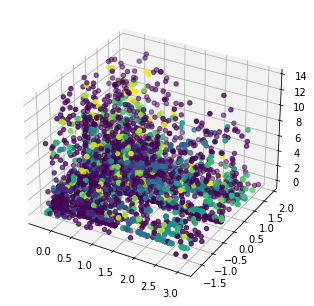

In [605]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 空间三维画图
fig = plt.figure()
df = pd.DataFrame(X, columns=['1', '2', '3'])
x=df['1']
y=df['2']
z=df['3']
ax = Axes3D(fig)
ax.scatter(x,y,z,c=labels)

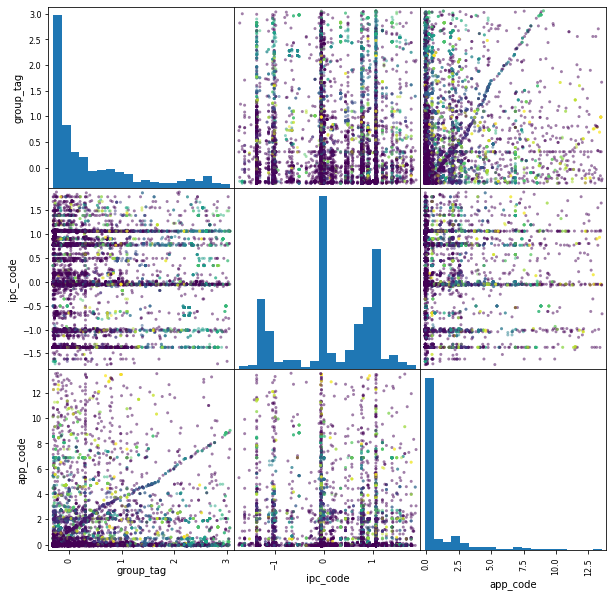

In [606]:
df = pd.DataFrame(X, columns=['group_tag', 'ipc_code', 'app_code'])
grr = pd.plotting.scatter_matrix(df,c = labels,hist_kwds={'bins':20}, figsize=[10,10])

In [607]:
# import pymysql
# conn = pymysql.Connect(  # 配置数据库
#     host='1.15.220.155',
#     port=3306,
#     user='test',
#     password='991125',
#     db='spider',
#     charset='UTF8'
# )
# cursor = conn.cursor()

# sql = 'select ipc from cluster'
# cursor.execute(sql)
# res = cursor.fetchall()
# count = 1
# for ip in res:
#     m = 0
#     sum = 0
#     ip = ip[0]
#     numbers = ip.split('.')
#     for n in numbers:
#         sum += int(n) * (count + m)
#         m += 1
#     sql = 'update cluster set ipc_sum = %s where ipc = %s'
#     cursor.execute(sql,[sum, ip])
#     conn.commit()